# MATH 210 Introduction to Mathematical Computing

## March 16, 2018

1. NumPy arrays
2. Linear systems of differential equations

In [1]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt
%matplotlib inline

## 1. NumPy arrays

Let's review some properties of NumPy arrays: shape and dimension.

We can think of a 1D NumPy array as a list of numbers.

We can think of a 2D NumPy array as a matrix.

When we select a row or column from a 2D NumPy array, the result is a 1D NumPy array.

This is different compared to MATLAB. When you select a column from a matrix, it's returned as a column vector which is a 2D matrix in MATLAB.

In [2]:
A = np.array([[1,2,3],[4,5,6],[7,8,9]])
print(A)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [3]:
v = A[:,1]
print(v)

[2 5 8]


In [4]:
A.ndim

2

In [5]:
A.shape

(3, 3)

In [6]:
v.ndim

1

In [7]:
v.shape

(3,)

If we want to make $v$ a column vector, in other words, a 2D matrix with 3 rows and 1 column, we need to reshape it!

In [8]:
v = v.reshape(3,1)

In [9]:
v

array([[2],
       [5],
       [8]])

In [10]:
v.ndim

2

In [11]:
v.shape

(3, 1)

## 2. Linear systems of differential equations

A [homogeneous first order linear system of differential equations](http://www.jirka.org/diffyqs/html/sys_chapter.html) is of the form:

$$
\begin{align*}
y'_0 &= a_{0,0} y_0 + \cdots + a_{0,n}y_n \\
y'_1 &= a_{1,0} y_1 + \cdots + a_{1,n}y_n \\
\vdots &=  \ \ \vdots \\
y'_n &= a_{n,0} y_n + \cdots + a_{n,n}y_n
\end{align*}
$$

where $y_0(t),y_1(t),\dots,y_n(t)$ are unknown functions of a single variable $t$.

In matrix form, the system is $\mathbf{y}'=A\mathbf{y}$ where $A$ is the matrix of coefficients and $\mathbf{y} = [y_0,y_1,\dots,y_n]^T$

How do we solve a system? Find the eigenvalues and eigenvectors! In particular, if $\mathbf{v}$ is aan eigenvector of $A$ with real eigenvalue $\lambda$, then $\mathbf{y}(t) = C \mathbf{v} e^{\lambda t}$ is a solution of $\mathbf{y}'=A\mathbf{y}$ (for any constant $C$).

Find a solution of the system $\mathbf{y}'=A\mathbf{y}$ where

$$
A = \begin{bmatrix} 1 & -3 \\ -3 & 5 \end{bmatrix}
$$

In [12]:
A = np.array([[1,-3],[-3,5]])
evals,evecs = la.eig(A)

In [13]:
print(evals)

[-0.60555128+0.j  6.60555128+0.j]


In [14]:
evals.dtype

dtype('complex128')

Even though the eigenvalues are returned as complex numbers, the eigenvalues are real (because $A$ is symmetric) and so the imaginary part is 0 (see the `0j`). We can use the `real` attribute to access the real part of the entries of the NumPy array `evals` and then reassign `evals`.

In [15]:
evals = evals.real

In [16]:
print(evals)

[-0.60555128  6.60555128]


Check out the eigenvectors of $A$ in the columns of `evecs`.

In [17]:
print(evecs)

[[-0.8816746   0.47185793]
 [-0.47185793 -0.8816746 ]]


Let's take the first eigenvalue and eigenvector and plot the solution:

$$
\mathbf{y}(t) = \begin{bmatrix} y_0(t) \\ y_1(t) \end{bmatrix} =
\begin{bmatrix} -0.8816746 \\ -0.47185793 \end{bmatrix} e^{-0.60555128 t}
=
\begin{bmatrix} -0.8816746e^{-0.60555128 t} \\ -0.47185793 e^{-0.60555128 t} \end{bmatrix}
$$

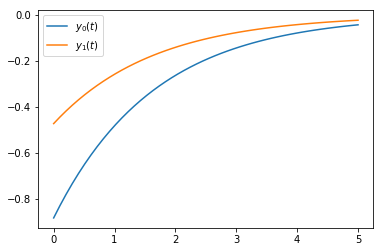

In [18]:
t = np.linspace(0,5,50)
y0 = evecs[0,0]*np.exp(evals[0]*t)
y1 = evecs[1,0]*np.exp(evals[0]*t)
plt.plot(t,y0,t,y1)
plt.legend(('$y_0(t)$','$y_1(t)$'))
plt.show()

If $A$ is an $n$ by $n$ matrix with $n$ distinct real eigenvalues $\lambda_1, \dots,\lambda_n$ with eigenvectors $\mathbf{v}_1, \dots, \mathbf{v}_n$, then the general form of the solution of the system $\mathbf{y}' = A\mathbf{y}$ is

$$
\mathbf{y}(t) = C_1 \mathbf{v}_1 e^{\lambda_1 t} + \cdots + C_n \mathbf{v}_n e^{\lambda_n t} \ \ , \ \ \ C_1,\dots,C_n \in \mathbb{R}
$$

Let's find the unique solution of our system above such that $\mathbf{y}(0) = [1 \ 1]^T$. The general solution is

$$
\mathbf{y}(t) = C_0 \mathbf{v}_0 e^{\lambda_0 t} + C_1 \mathbf{v}_1 e^{\lambda_1 t}
$$

How do we find constants $C_0$ and $C_1$? We need to solve

$$
\begin{bmatrix} 1 \\ 1 \end{bmatrix}
=
C_0 \mathbf{v}_0 + C_1 \mathbf{v}_1
=
\begin{bmatrix} \mathbf{v}_0 & \mathbf{v}_1 \end{bmatrix}
\begin{bmatrix} C_0 \\ C_1 \end{bmatrix}
$$

In [19]:
b = np.array([[1],[1]])
C = la.solve(evecs,b)

In [20]:
print(C)

[[-1.35353252]
 [-0.40981667]]


Success!